In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [3]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import pickle

In [5]:
# # Load wordembeddings
final_embeddings = np.load('./Dataset/final_embeddings_52_with_cnseg0508_distance.npy')
word_dict = {}
with open('./Dataset/dictionary_52_with_cnseg0508.pickle', 'rb') as myfile:
    word_dict = pickle.load(myfile)
reversed_dictionary = dict(zip(word_dict.values(), word_dict.keys()))

In [6]:
word_seq = [x[1] for x in reversed_dictionary.items()]

In [7]:
df_word2vec = df(final_embeddings, index= word_seq)

In [4]:
df_tweet = pd.read_csv('Dataset/pattern_experiment0511.csv')

In [5]:
df_tweet.columns

Index(['Unnamed: 0', 'message', 'emo'], dtype='object')

In [6]:
df_tweet = df_tweet.drop(['Unnamed: 0'], axis=1)

In [7]:
df_tweet = df_tweet.rename({'message': 'sentence'}, axis=1)

In [10]:
df_tweet = df_tweet.drop_duplicates()

In [11]:
df_tweet.to_pickle('Dataset/df_sampled_tweet.pkl')

In [6]:
df_tweet = pd.read_pickle('Dataset/df_sampled_tweet.pkl')

In [13]:
df_word2vec.to_pickle('Dataset/df_word2vec.pkl')

In [17]:
df_word2vec = pd.read_pickle('Dataset/df_word2vec.pkl')

# Tf-idf 
filter frequent words into cluster

In [ ]:
df_tweet

In [7]:
tfidfVectorizer = TfidfVectorizer(input = df_tweet.sentence.tolist(), 
                                 decode_error = 'ignore',
                                 analyzer= 'word',
                                 ngram_range = (1, 1),
                                 stop_words = None)

In [8]:
tfidfVec = tfidfVectorizer.fit_transform(df_tweet.sentence.tolist())

In [17]:
df_tweet.sentence.tolist()[:2]

['\x08 感覺 這 一篇 所 講的 就是 鑑往 知 來 ， 是 這樣 嗎 ？', '\x08 時髦 真的 好 可愛 <3']

In [9]:
tfidfVectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '0001',
 '0008',
 '001',
 '0018',
 '004',
 '007',
 '008',
 '0080',
 '0085',
 '0087',
 '0098',
 '00xx',
 '01',
 '0107',
 '0111',
 '0117',
 '013',
 '014',
 '018',
 '02',
 '0200',
 '0204',
 '0206',
 '0214',
 '03',
 '030',
 '0303',
 '0316',
 '034',
 '04',
 '0400',
 '0402',
 '0411',
 '042',
 '047',
 '049',
 '05',
 '06',
 '0600',
 '0602',
 '0608',
 '0611',
 '0619',
 '0630',
 '064',
 '0651',
 '0678',
 '06勒',
 '07',
 '0711',
 '0726',
 '0728',
 '075',
 '078',
 '08',
 '080',
 '0800',
 '0806',
 '0809',
 '0819',
 '0830',
 '0833',
 '084',
 '0857',
 '0887',
 '09',
 '090',
 '0900',
 '0905',
 '0920',
 '0948',
 '0963',
 '0a',
 '0a0',
 '0k',
 '0mg',
 '0u0',
 '0v',
 '0w0',
 '0yy',
 '0个',
 '0个啊',
 '0人',
 '0個',
 '0分',
 '0娘壘',
 '0票',
 '0秒',
 '0秒儀',
 '0秒鐘',
 '10',
 '100',
 '1000',
 '1004',
 '1007',
 '101',
 '1014',
 '102',
 '1021',
 '1022',
 '1024',
 '103',
 '104',
 '1040',
 '1043',
 '1045',
 '105',
 '1058',
 '106',
 '1060',
 '1062',
 '107',
 '1074',
 '108',
 '1080',
 '1087',
 '109',

In [10]:
def top_tfidf_feats(vec, features, top_n=25):
    ''' Get top n tfidf values and return them with their corresponding feature names.'''
    sum_feats = np.asarray(np.sum(tfidfVec, axis=0)).reshape(-1)
    topn_ids = sum_feats.argsort()[::-1][:top_n]
    #print(topn_ids)
    top_feats = [(features[i], sum_feats[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['word', 'tfidf']
    return df

In [11]:
df_all_tfidf = top_tfidf_feats(tfidfVec, tfidfVectorizer.get_feature_names(),-1)

In [12]:
sum_tfidf = sum(df_all_tfidf.tfidf)

In [13]:
df_cumsum = df_all_tfidf.tfidf.cumsum()/sum_tfidf

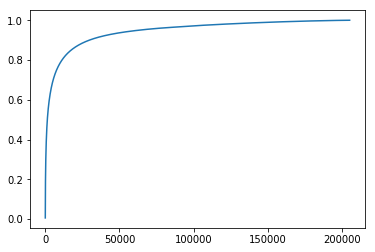

In [14]:
df_cumsum.plot()

In [15]:
df_cumsum[df_cumsum <= 0.95]

0        0.005763
1        0.009577
2        0.013380
3        0.017156
4        0.020778
5        0.024259
6        0.027667
7        0.031037
8        0.034383
9        0.037500
10       0.040391
11       0.043112
12       0.045680
13       0.048229
14       0.050712
15       0.053133
16       0.055425
17       0.057699
18       0.059924
19       0.062124
20       0.064256
21       0.066345
22       0.068398
23       0.070436
24       0.072472
25       0.074481
26       0.076413
27       0.078332
28       0.080246
29       0.082120
           ...   
63058    0.949975
63059    0.949976
63060    0.949977
63061    0.949978
63062    0.949979
63063    0.949979
63064    0.949980
63065    0.949981
63066    0.949982
63067    0.949983
63068    0.949984
63069    0.949984
63070    0.949985
63071    0.949986
63072    0.949987
63073    0.949988
63074    0.949989
63075    0.949989
63076    0.949990
63077    0.949991
63078    0.949992
63079    0.949993
63080    0.949994
63081    0.949995
63082    0

In [16]:
df_cumsum[df_cumsum <= 0.90]

0        0.005763
1        0.009577
2        0.013380
3        0.017156
4        0.020778
5        0.024259
6        0.027667
7        0.031037
8        0.034383
9        0.037500
10       0.040391
11       0.043112
12       0.045680
13       0.048229
14       0.050712
15       0.053133
16       0.055425
17       0.057699
18       0.059924
19       0.062124
20       0.064256
21       0.066345
22       0.068398
23       0.070436
24       0.072472
25       0.074481
26       0.076413
27       0.078332
28       0.080246
29       0.082120
           ...   
29689    0.899919
29690    0.899922
29691    0.899924
29692    0.899927
29693    0.899930
29694    0.899933
29695    0.899935
29696    0.899938
29697    0.899941
29698    0.899944
29699    0.899947
29700    0.899949
29701    0.899952
29702    0.899955
29703    0.899958
29704    0.899960
29705    0.899963
29706    0.899966
29707    0.899969
29708    0.899971
29709    0.899974
29710    0.899977
29711    0.899980
29712    0.899983
29713    0

In [18]:
df_candidate = top_tfidf_feats(tfidfVec, tfidfVectorizer.get_feature_names(),36000)

In [19]:
df_word2vec.index.isin(df_candidate.word.tolist())

array([False, False, False, ..., False, False, False], dtype=bool)

In [20]:
df_candidate = df_candidate[df_candidate.word.apply(
    lambda x: x in df_word2vec.index)].copy()

In [21]:
df_candidate_vec = df_word2vec.loc[df_candidate.word].copy()

In [22]:
df_candidate_vec.to_pickle('Dataset/df_candidate_vec.pkl')

In [33]:
df_candidate_vec = pd.read_pickle('Dataset/df_candidate_vec.pkl')

# Agglomerative Clustering
form conceptual clusters based on candidate word2vec

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
pd.set_option('display.max_colwidth', -1)

In [25]:
%%time
Ks = range(1000, 20100, 100)
acs = []
for k in Ks:
    ac = AgglomerativeClustering(n_clusters=k,
                                affinity='euclidean',
                               memory='/tmp',
                               linkage='ward').fit(df_candidate_vec)
    acs.append(ac)
    #print('clustering {} done'.format(k))

CPU times: user 60 s, sys: 2.37 s, total: 1min 2s
Wall time: 1min 2s


In [28]:
from eval_syn_cluster import eval_syn_cluster

In [29]:
scores = [eval_syn_cluster(df({'word': df_candidate_vec.index, 'cluster': ac.labels_}), '_chn') for ac in acs ]

In [30]:
scores

[{'completeness_score': 0.86540613119745113,
  'homogeneity_score': 0.64299093787688621},
 {'completeness_score': 0.86665919949091885,
  'homogeneity_score': 0.64997320673135928},
 {'completeness_score': 0.86750407939877139,
  'homogeneity_score': 0.65547357011282381},
 {'completeness_score': 0.86863202191882527,
  'homogeneity_score': 0.6623236958529426},
 {'completeness_score': 0.86959396016754631,
  'homogeneity_score': 0.66794819615728518},
 {'completeness_score': 0.87070217126359617,
  'homogeneity_score': 0.67527021215175331},
 {'completeness_score': 0.87102003364149638,
  'homogeneity_score': 0.67718149443251796},
 {'completeness_score': 0.87154859655736605,
  'homogeneity_score': 0.68112474023045344},
 {'completeness_score': 0.8719394386958722,
  'homogeneity_score': 0.68350991950622686},
 {'completeness_score': 0.87237931070218178,
  'homogeneity_score': 0.68621178508267877},
 {'completeness_score': 0.87323987783133061,
  'homogeneity_score': 0.69192969595163334},
 {'completen

In [31]:
df_scores = df(scores, index=Ks)

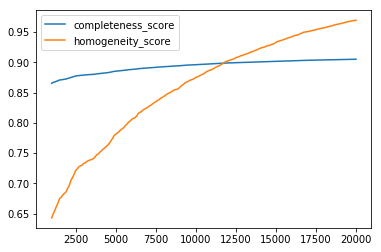

In [32]:
df_scores.plot()

In [33]:
6000/100

60.0

In [34]:
df_cluster = df({'word': df_candidate_vec.index, 'cluster': acs[100].labels_}).groupby('cluster').word.apply(list)

In [35]:
df_cluster.loc[353]

['偉晉',
 '對抗',
 '失眠',
 '大大',
 '龍頭',
 '嘲笑',
 '格格',
 '中原',
 '要跑',
 '忘本',
 '年內',
 '不挺',
 '阿嗚',
 '要修',
 '護主',
 '冷眼',
 '悶熱',
 '殲滅',
 '之士',
 '政勳',
 '裏的',
 '別急',
 '鬥狗',
 '的跟',
 '文豪',
 '一隻狗狗',
 '爭霸',
 '皮膚科',
 '來西',
 '打下',
 '開房',
 '屁股癢',
 '感謝祢',
 '易舉',
 '鎖死',
 '越黑',
 '值不',
 '惠惠',
 '徐佳',
 '立喆',
 '應有的',
 '背信',
 '多寡',
 '民衆',
 '見智',
 '就又',
 '世间',
 '明君',
 '戰備',
 '錄音檔',
 '東勢',
 '減到',
 '新兵']

In [36]:
df_filtered_cluster = df_cluster[df_cluster.apply(len) > 1]

In [37]:
df_word2cluster = df({'word': df_candidate_vec.index, 'cluster': acs[100].labels_})

In [38]:
df_word2cluster[df_word2cluster.cluster.isin(df_filtered_cluster.index)].to_pickle('df_word2cluster.pkl')